# Dogs vs. Cats

dataset on kaggle https://www.kaggle.com/tongpython/cat-and-dog

required modules

In [2]:
import numpy as np
import pandas as pandas
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
import h5py

get the dataset

In [5]:
def get_dataset():

    image_size = 224

    X_train = []
    X_test = []
    Y_train = []
    Y_test = []


    BASE_PATH = os.getenv('HOME') + '/Downloads/dogs-vs-cats'

    labels = ['cats','dogs']
    targets = ['training_set', 'test_set']

    try:
            
        for target in targets:

            X = []
            Y = []

            for label in labels:
                image_path = os.path.join(BASE_PATH, target, label)

                # list files in the folder
                image_list = os.listdir(image_path)

                for img_file in image_list:

                    # check file extension
                    _, file_ext = os.path.splitext(img_file)
                    if file_ext != '.jpg':
                        continue

                    # read the image
                    img = cv2.imread(os.path.join(image_path, img_file))

                    # convert the image to gray scale
                    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                    # resize the image
                    img = cv2.resize(img, (image_size, image_size))

                    # convert in numpy array
                    img_arr = np.asarray(img)

                    X.append(img_arr)

                    if label == 'dogs':
                        Y.append([0, 1])
                    else:
                        Y.append([1, 0])
                    
                
            if target == 'training_set':
                X_train = np.array(X)
                Y_train = np.array(Y)
            else:
                X_test = np.array(X)
                Y_test = np.array(Y)
    except:
        print('Error on file ', os.path.join(image_path, img_file))
        return

    return (X_train, Y_train),(X_test, Y_test)



In [6]:
(X_train, Y_train), (X_test, Y_test) = get_dataset()

In [7]:
print('X_train:', str(X_train.shape))
print('Y_train:', str(Y_train.shape))    
print('X_test:', str(X_test.shape))    
print('Y_test:', str(Y_test.shape))     

X_train: (8005, 224, 224, 3)
Y_train: (8005, 2)
X_test: (2023, 224, 224, 3)
Y_test: (2023, 2)


shuffle the dataset

In [8]:
idx = [i for i in range(X_train.shape[0])]
idx = np.random.permutation(idx) 
X_train = X_train[idx,:]
Y_train = Y_train[idx]

idx = [i for i in range(X_test.shape[0])]
idx = np.random.permutation(idx) 
X_test = X_test[idx,:]
Y_test = Y_test[idx]

display some train images

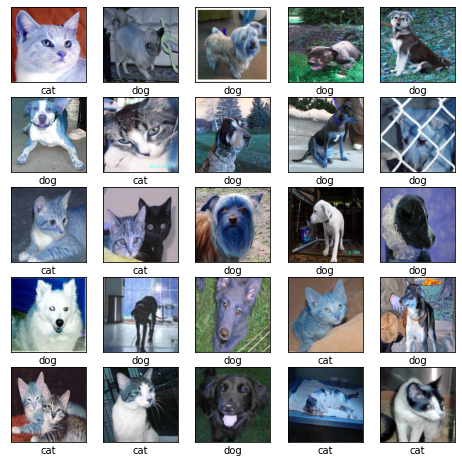

In [9]:
class_names = ['cat', 'dog']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(Y_train[i])])
plt.show()